# Python pour la Data Science

## 4) Les graphiques statistiques avec Seaborn 

Seaborn est une librairie construite sur les bases de Matplotlib et de Pandas et qui permet de faire de la visualisation de données très poussée avec un minimum de lignes de code. C'est LA bibliothèque graphique des Data Scientists qui n'ont pas trop envie de programmer.

Vous trouverez ici la documentation seaborn :

[Seaborn](https://seaborn.pydata.org)

In [1]:
# on commence par importer nos bibliothèques préférées
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Seaborn propose  quelques data sets :

import seaborn as sns
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
# et on ne se lasse pas des iris...
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


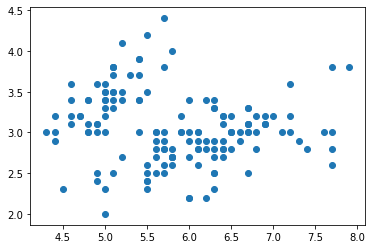

In [4]:
# On sait visualiser quelques couples de variables avec matplotlib
plt.scatter(iris['sepal_length'],iris['sepal_width'])
plt.show()

Pour améliorer ce graphique, il faudrait des axes, une légende, une couleur qui varie en fonction de l'espèce et cela pour tout couple de variables, donc... pas mal de code!
la fonction pairplot de Seaborn donne en une ligne, beaucoup d'informations : 

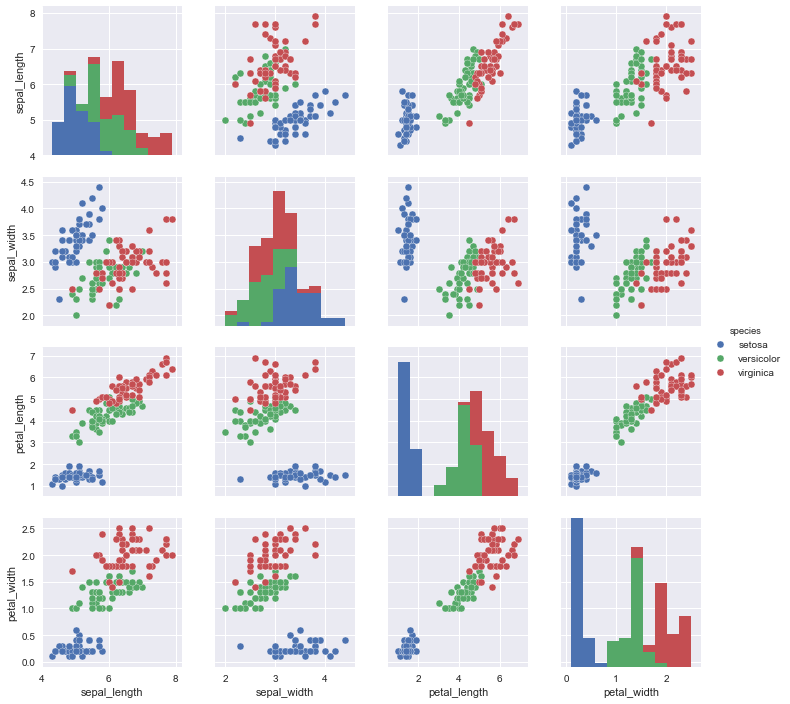

In [14]:
sns.pairplot(iris,hue='species')
plt.show()

In [5]:
# regardons le dataset titanic...
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.drop(['alone','alive','who','embark_town','adult_male','class'],axis=1,inplace=True)
titanic.dropna(axis=0,inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


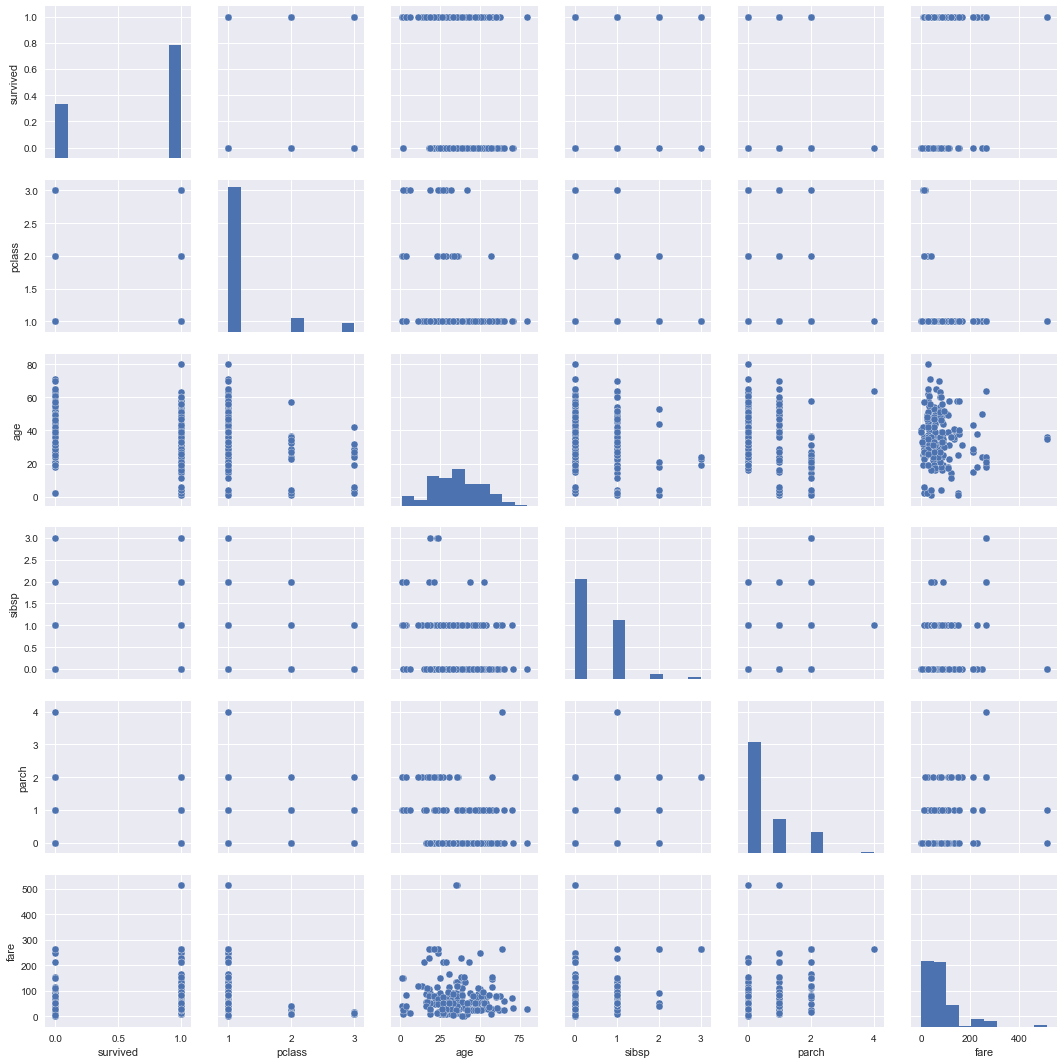

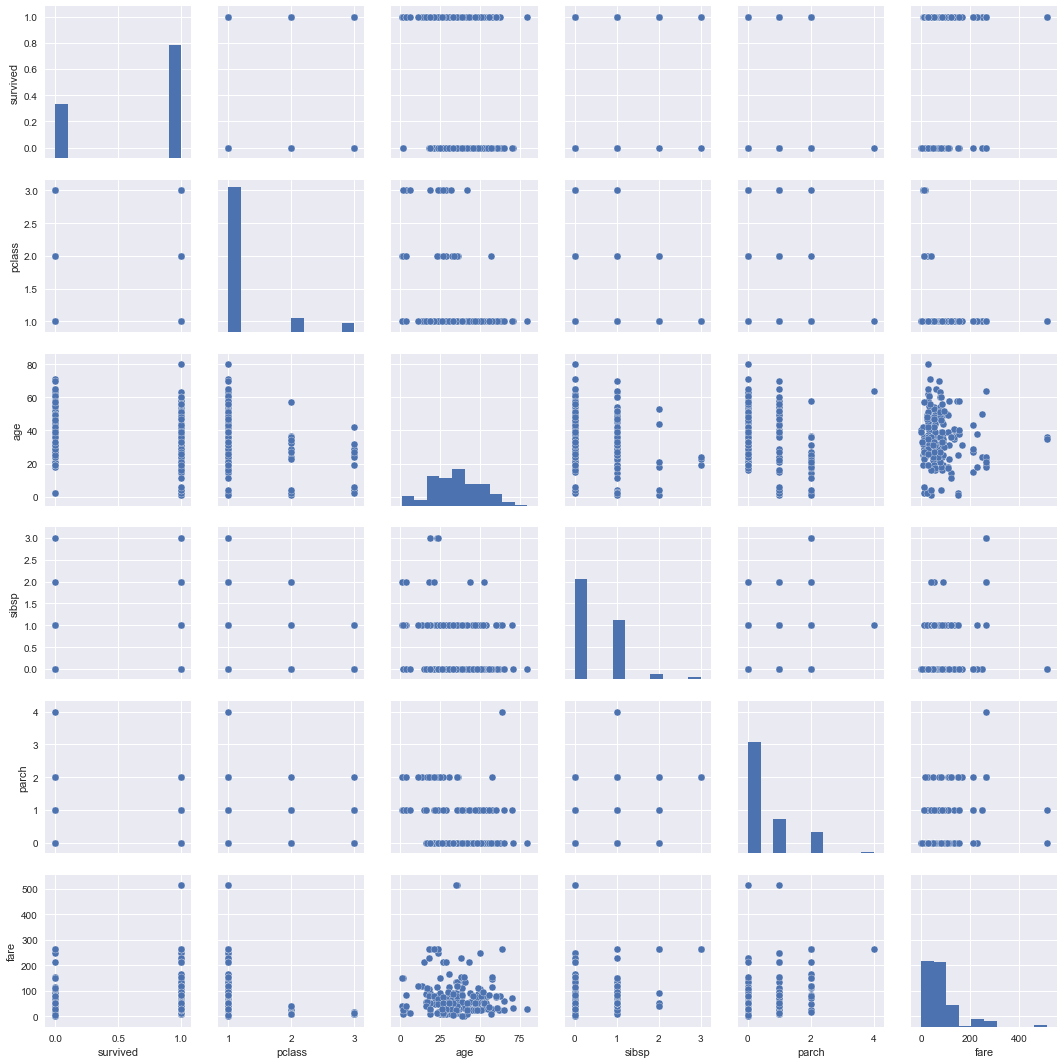

In [10]:
sns.pairplot(titanic)
plt.show()

Les nuages de points sont étanges! C'est normal, la plupart des variables sont discrètes, donc forment des catégories.
Nous allons donc utiliser les graphiques dédiés aux catégories :

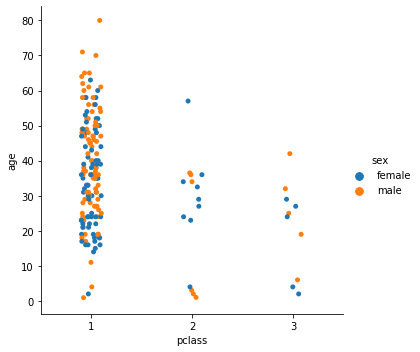

In [7]:
sns.catplot(x='pclass',y='age',data=titanic,hue='sex')


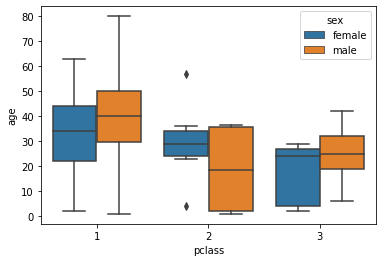

In [8]:
# Boites à moustache avec mediane, quartiles, min, max, anomalies...
sns.boxplot(x='pclass',y='age',data=titanic,hue='sex')
plt.show()

/home/flodarpie/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

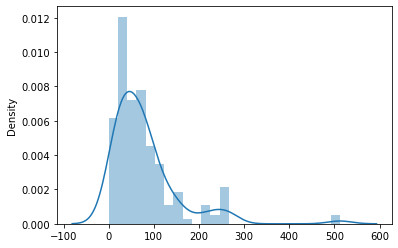

In [10]:
sns.distplot(np.array(titanic['fare']))
plt.show()

/home/flodarpie/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:

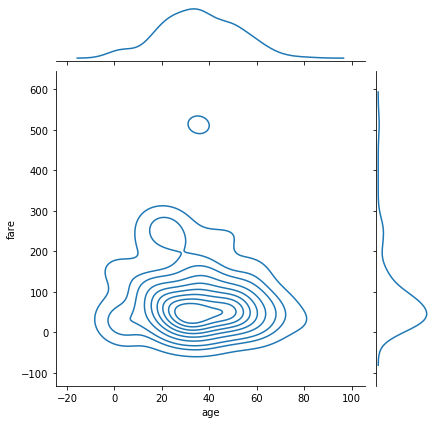

In [11]:
sns.jointplot('age','fare',data=titanic,kind='kde')
plt.show()

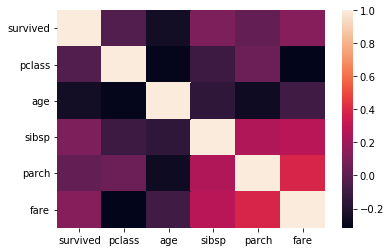

In [12]:
# Visualisation de matrices de corrélation
A=titanic.corr()
sns.heatmap(A)
plt.show()